## Task 1: Nạp các thư viện và tải file dữ liệu

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import os
import glob

In [8]:
filename=input("Nhập file dữ liệu cần tải lên: ")
df=pd.read_csv(filename)
df

Nhập file dữ liệu cần tải lên: C:\Users\ADMIN\Downloads\Compressed\Sales-Reporting-main\data\sales2019_1.csv


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


## Bước 2: Làm sạch và xử lý dữ liệu

### Bước 2.1: Gộp dữ liệu 12 tháng

In [24]:

#define path to CSV files
path = '/Data analyst/Sales Ecommerce/Sales-Reporting-main/data/'
df=pd.DataFrame()
for file in os.listdir(os.getcwd()):
    if (file.endswith('.csv')):
        df=df.append(pd.read_csv(file))
df.to_csv(path+'annualSales2019.csv',index=False)

In [ ]:
###Bước 2.2: Thêm cột tháng

In [32]:
df['Month']=df['Order Date'].str[:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [ ]:
###Bước 2.3: Loại bỏ giá trị NAN và OR(Do có các hàng là tiêu đề cột của 12 file)

In [36]:
#drop cloumn nan
df=df.dropna(how='all')
df = df.dropna(how='all')
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [ ]:
###Bước 2.4: Kiểm tra kiểu dữ liệu và chuyển đổi kiểu dữ liệu

In [46]:
print("Before change dtypes...")
df.info()
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'],downcast="integer")
df['Month']=pd.to_numeric(df['Month'],downcast="integer")
df['Price Each']=pd.to_numeric(df['Price Each'],downcast="float")
df['Order Date']=pd.to_datetime(df['Order Date'])
print("After change dtypes...")
df.info()

Before change dtypes...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int8          
 3   Price Each        185950 non-null  float32       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int8          
dtypes: datetime64[ns](1), float32(1), int8(2), object(3)
memory usage: 8.2+ MB
After change dtypes...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object  

In [ ]:
## Bước 3: Tạo Báo Cáo (Trả lời câu hỏi)

In [ ]:
###Câu hỏi 1: Tháng nào có doanh số tốt nhất? Doanh số tháng đó là bao nhiêu?

[1822256.75, 2202022.5, 2807100.25, 3390670.25, 3152606.75, 2577802.25, 2647775.75, 2244467.75, 2097560.0, 3736726.75, 3199603.25, 4613443.5]


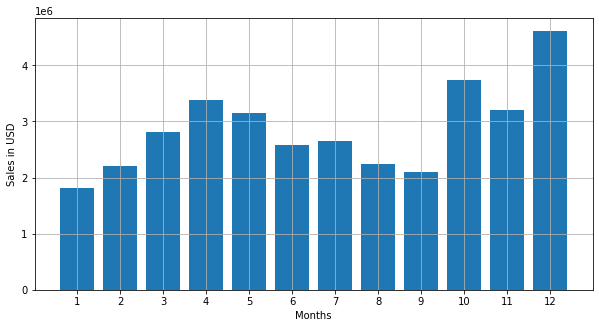

In [110]:
df['Sales']=df['Quantity Ordered']*df['Price Each']
#Di chuyển cột sales qua sau price
moving_column=df.pop('Sales')
df.insert(4,'Sales',moving_column)
#Tính tổng Doanh số theo từng tháng

sales_value_by_month=df.groupby('Month').sum()['Sales']
value_by_month=[value for value in sales_value_by_month]
print(value_by_month)
# Tạo biểu đồ cột hiển thị Doanh số theo từng tháng
plt.figure(figsize = (10,5))
months=range(1,13)
plt.bar(x=months,height=sales_value_by_month)

plt.xticks(months)

plt.xlabel("Months")
plt.ylabel("Sales in USD")

plt.grid()
plt.show()

Kết luận: Tháng có doanh số tốt nhất là tháng 12 với Doanh số là 4613443.5 USD

In [ ]:
###Câu hỏi 2:Thành phố nào có doanh số cao nhất?

<ipython-input-126-1294ef795b32>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, sales_value[i], sales_value[i], ha = 'center',


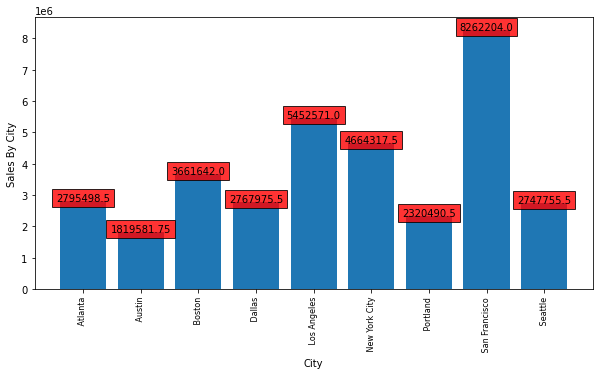

8262204.0


In [126]:
#Tạo 1 function để cắt thành phố từ địa chỉ
address_to_city=lambda address:address.split(",")[1]
df['City']=df['Purchase Address'].apply(address_to_city)
#Doanh số theo từng thành phố
sales_by_city=df.groupby('City').sum()['Sales']
#Tạo biểu đồ bar chart
cities=[city for city,value in sales_by_city.items()]
sales_value=[value for city,value in sales_by_city.items()]
plt.figure(figsize = (10,5))
plt.bar(x=cities,height=sales_by_city,data=sales_by_city)
plt.xticks(cities, rotation=90, size=8)
for i in range(len(cities)):
        plt.text(i, sales_value[i], sales_value[i], ha = 'center',
                 Bbox = dict(facecolor = 'red', alpha =.8))
plt.xlabel("City")
plt.ylabel("Sales By City")
plt.show()
print(max(sales_value))

Kết luận: Doanh số bán hàng tại San Francisco lớn nhất với giá trị là 8262204 USD

In [ ]:
###Câu hỏi 3: Doanh nghiệp cần chiếu quảng cáo vào khung thời gian nào để tăng khả năng mua hàng của khách hàng?

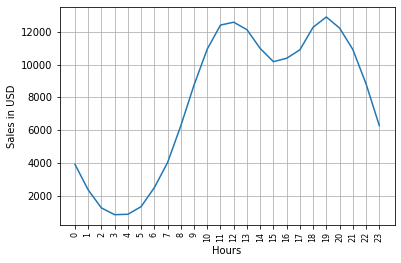

In [122]:
df.head()
df['Hours']=df['Order Date'].dt.hour
sales_value_hours=df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]
# Vẽ biểu đồ đường hiển thị
plt.plot(hours,sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

Từ biểu đồ trên ta nhận thấy khung thời gian từ 11h-12h và 18-20h là 2 khung thời gian có số lượng đơn hàng nhiều nhất. Do đó
Ta có kết luận như sau:
- Doanh nghiệp nên chiếu quảng cáo trước tầm 30 phút của những khung thời gian trên để tăng khả năng mua hàng của khách hàng
- Tập trung xây dựng chiến dịch quảng cáo phù hợp với khách hàng theo khung thời gian trên để tối ưu hóa cơ hội thành doanh thu

In [ ]:
###Câu 4: Những sản phẩm nào thường được bán cùng nhau?

In [130]:
#Để tìm những sản phẩm mua cùng nhau chúng ta sẽ lọc những đơn hàng có mã lặp lại để tìm và loại bỏ mã đơn hàng k trùng lặp
#để keep =false để k id trùng lặp k bị xóa
df_dup = df[df['Order ID'].duplicated(keep=False)]
#Tạo function nhóm các tên sản phẩm lại với nhau
groupProduct = lambda product: ', '.join(product)
#Tạo bảng mới chứa chuỗi các sản phẩm theo order ID
#apply trả về dataframe(bảng) còn transform trả về 1 series tức là cột
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
#Tạo 1 iterator để lưu trữ nhóm sản phẩm và số lượng bán của từng sản phẩm trong nhóm
from itertools import combinations
from collections import Counter

count = Counter()

for products in df_dup['All Products']:
    product_list = products.split(",")
    count.update(Counter(combinations(product_list, 2)))


#Bỏ đi những dòng duplicate không cần thiết nữa
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
#Lấy ra các nhóm sản phẩm và số lượng đã bán với nhóm đó
for key, value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 2140
('Google Phone', ' USB-C Charging Cable') 2116
('iPhone', ' Wired Headphones') 987
('Google Phone', ' Wired Headphones') 949
('iPhone', ' Apple Airpods Headphones') 799
('Vareebadd Phone', ' USB-C Charging Cable') 773
('Google Phone', ' Bose SoundSport Headphones') 503
(' USB-C Charging Cable', ' Wired Headphones') 372
('Vareebadd Phone', ' Wired Headphones') 327
(' Lightning Charging Cable', ' Wired Headphones') 193


<ipython-input-130-44e932b89221>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


Từ bản trên ta thấy được: 
- Khách hàng khi mua iphone có xu hướng mua kèm thêm cổng sạc lightning cho điện thoại hoặc Tai nghe Không dây
- Khách hàng mua Google Phone thì mua kèm thêm cổng USB - C hoặc tai nghe không dây
Từ đó kết luận được:
- Sản phẩm Điện thoại với cáp sạc hoặc điện thoại với tai nghe thường được bán cùng nhau

In [ ]:
###Câu 5: Sản phẩm nào được bán nhiều nhất? Giả thiết của bạn về lý do sản phẩm này được bán nhiều nhất là gì? 

<ipython-input-133-695b781e627a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


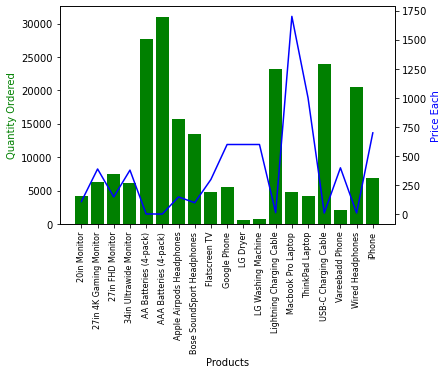

In [133]:
#Nhóm theo sản phẩm để tính tổng sản phẩm đã bán theo tên sản phẩm
all_products = df.groupby('Product').sum()['Quantity Ordered']
prices = df.groupby('Product').mean()['Price Each']
products_ls = [product for product, quant in all_products.items()]

x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()

In [ ]:
Nhìn từ biểu đồ ta thấy sản phẩm Bin AAA là sản phẩm bán chạy nhất.
Giả thiết đặt ra là liệu giá cả có phải yếu tố quyết định đến doanh số của pin AAA bán chạy nhất hay không
Sau khi nhìn biểu đồ thể hiện mối tương quan của giá và doanh số ta rút ra kết luận như sau:
    - sản phẩm có giá thấp có xu hướng bán chạy hơn so với những sản phẩm giá cao hơn
    - Các sản phẩm xa xỉ phẩm như laptop, macbook mặc dù giá cao hơn nhưng lại bán chạy hơn so với sản phẩm máy giặt, sấy.
    Điều này có thể là do yếu tố thương hiệu hoặc nhu cầu về máy tính nhiều hơn so với các máy giặt sấy nên mặc dù giá cao 
    nhưng lại bán chạy hơn 